In [104]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline

In [105]:
df = pd.read_csv('./Q11&12/DataFiles/house-prices-advanced-regression-techniques/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [106]:
len(df)

1460

In [107]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Handling Nulls

In [108]:
null_counts = df.isnull().sum()

# print the summary of null values for each column
print(null_counts)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [109]:
null_counts[null_counts != 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [110]:
# Impute null values in LotFrontage column with the mean
df["LotFrontage"].fillna(df["LotFrontage"].mean(), inplace=True)

# Replace null values in Alley column with a new category "No alley access"
df["Alley"].fillna("No alley access", inplace=True)

# Impute null values in MasVnrType and MasVnrArea columns with the mode and median respectively
df["MasVnrType"].fillna(df["MasVnrType"].mode()[0], inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)

# Replace null values in BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, and BsmtFinType2 columns with a new category "No basement"
basement_cols = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
for col in basement_cols:
    df[col].fillna("No basement", inplace=True)

# Impute null value in Electrical column with the mode
df["Electrical"].fillna(df["Electrical"].mode()[0], inplace=True)

# Replace null values in FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, and GarageCond columns with a new category "No fireplace" or "No garage"
fireplace_cols = ["FireplaceQu"]
garage_cols = ["GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond"]
for col in fireplace_cols:
    df[col].fillna("No fireplace", inplace=True)
for col in garage_cols:
    df[col].fillna("No garage", inplace=True)

# Replace null values in PoolQC, Fence, and MiscFeature columns with a new category "No pool", "No fence", or "No miscellaneous feature"
df["PoolQC"].fillna("No pool", inplace=True)
df["Fence"].fillna("No fence", inplace=True)
df["MiscFeature"].fillna("No miscellaneous feature", inplace=True)


In [111]:
null_counts = df.isnull().sum()

# print the summary of null values for each column
null_counts[null_counts != 0]

Series([], dtype: int64)

## Q1. What is the distribution of SalePrice in the dataset, and is it skewed or normal?

/tmp/ipykernel_7019/4004821029.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4})


<Axes: xlabel='SalePrice', ylabel='Density'>

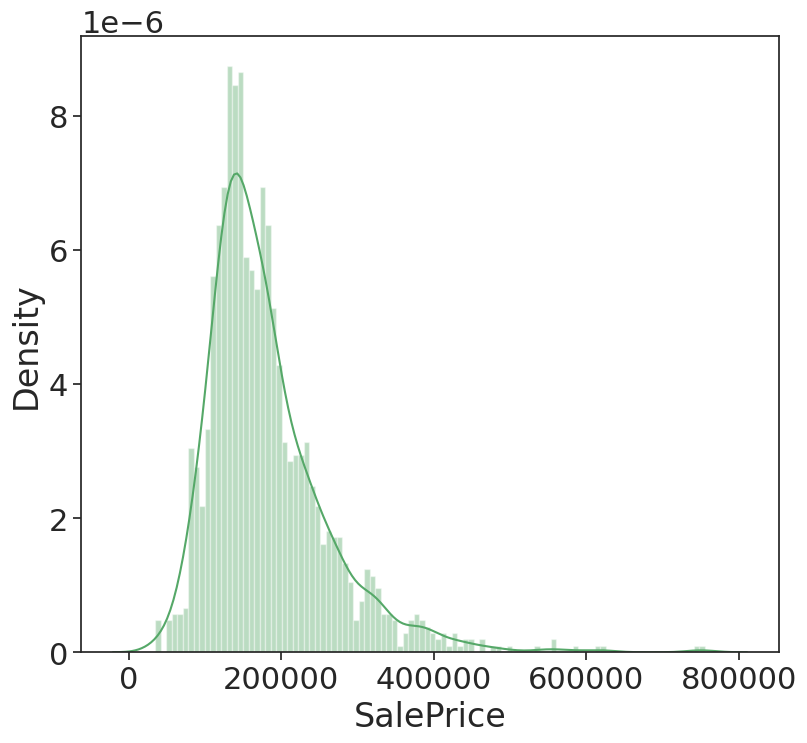

In [112]:
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4})

In [113]:
df.drop('Id', axis=1, inplace=True)


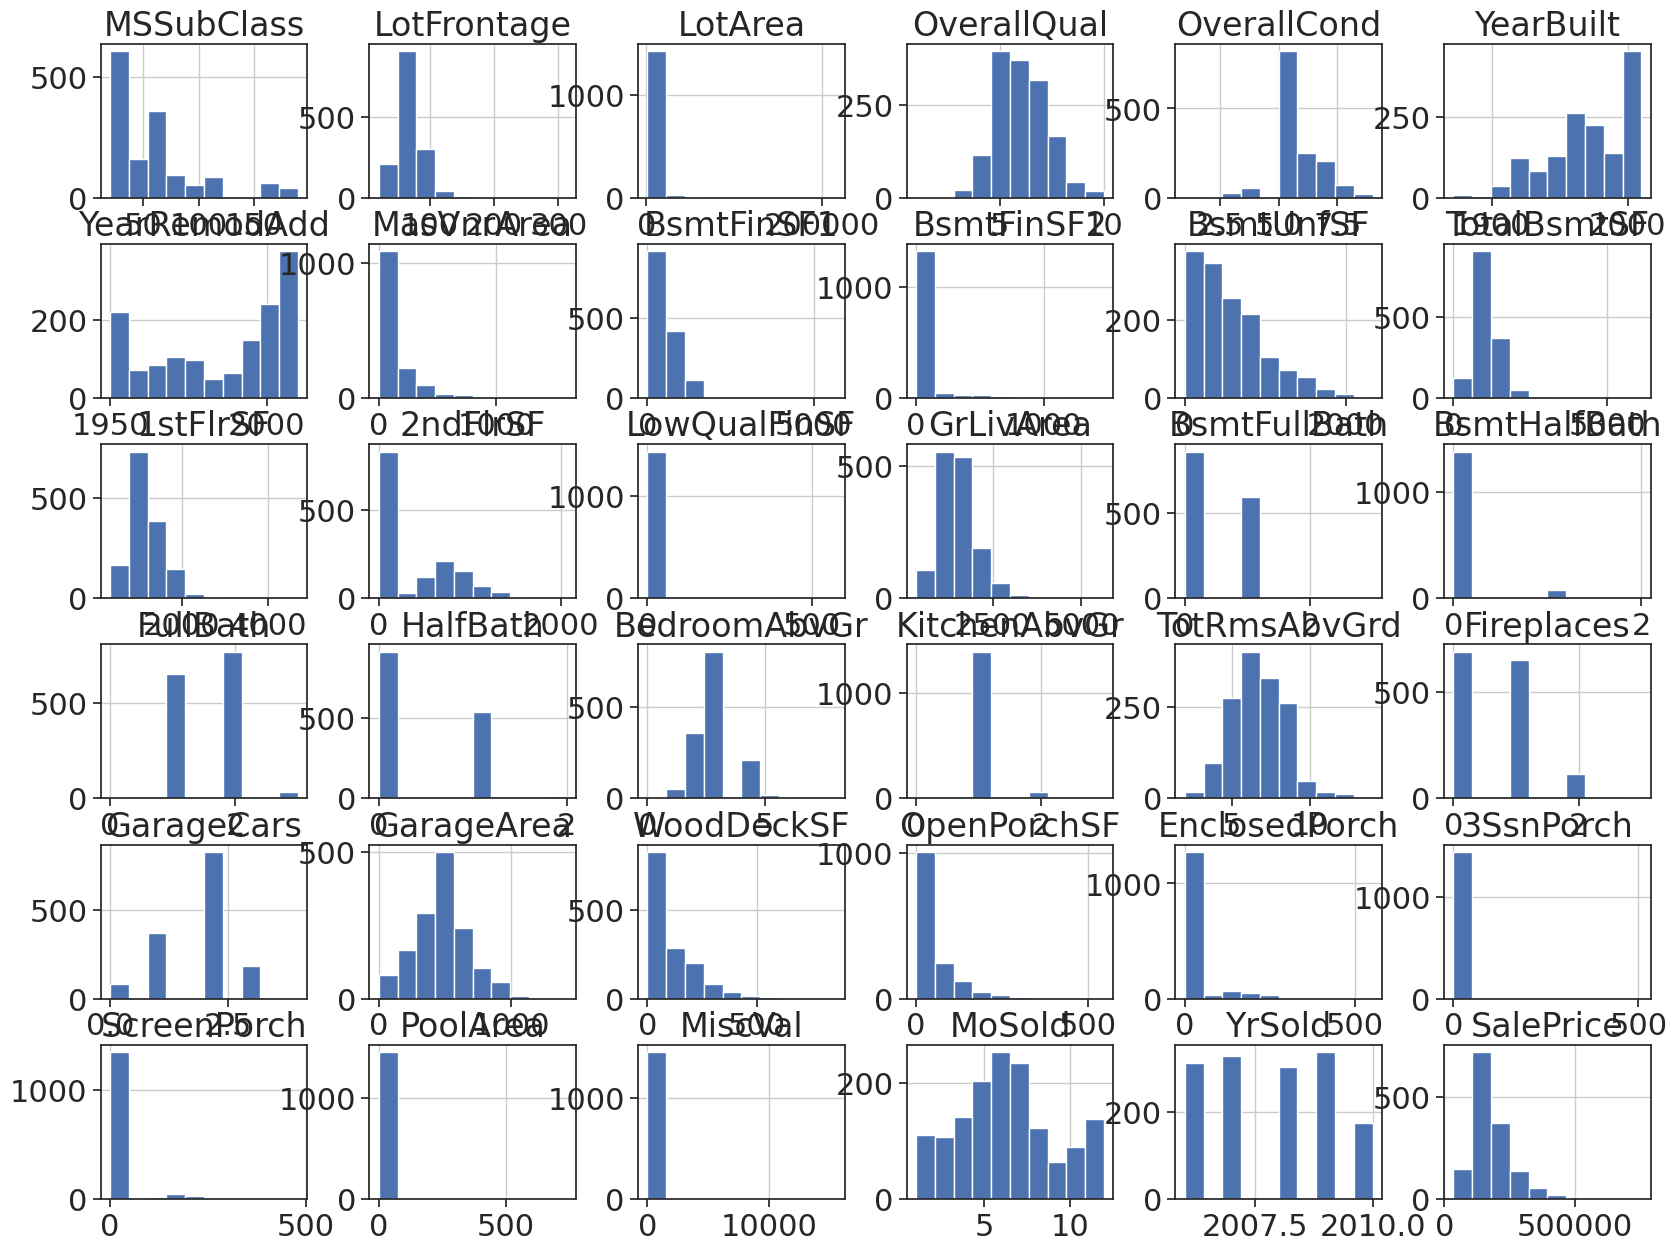

In [114]:

# Select only numerical columns
numeric_cols = df.select_dtypes(include=[np.number])

# Plot histograms of all numerical columns
numeric_cols.hist(figsize=(20, 15))
plt.show()


In [115]:
# Noted that some columns has single values 
df.MiscVal.value_counts()

MiscVal
0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: count, dtype: int64

In [116]:
df.PoolArea.value_counts()

PoolArea
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: count, dtype: int64

In [117]:
df['3SsnPorch'].value_counts()

3SsnPorch
0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: count, dtype: int64

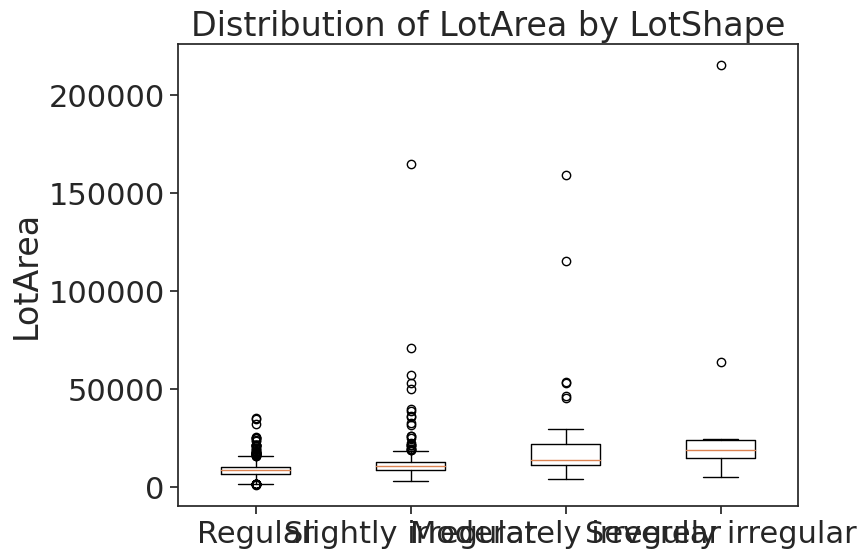

In [118]:
import matplotlib.pyplot as plt

# create a box plot of LotShape vs. LotArea
fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot([df[df['LotShape']=='Reg']['LotArea'],
            df[df['LotShape']=='IR1']['LotArea'],
            df[df['LotShape']=='IR2']['LotArea'],
            df[df['LotShape']=='IR3']['LotArea']])
ax.set_xticklabels(['Regular', 'Slightly irregular', 'Moderately irregular', 'Severely irregular'])
ax.set_ylabel('LotArea')
ax.set_title('Distribution of LotArea by LotShape')
plt.show()


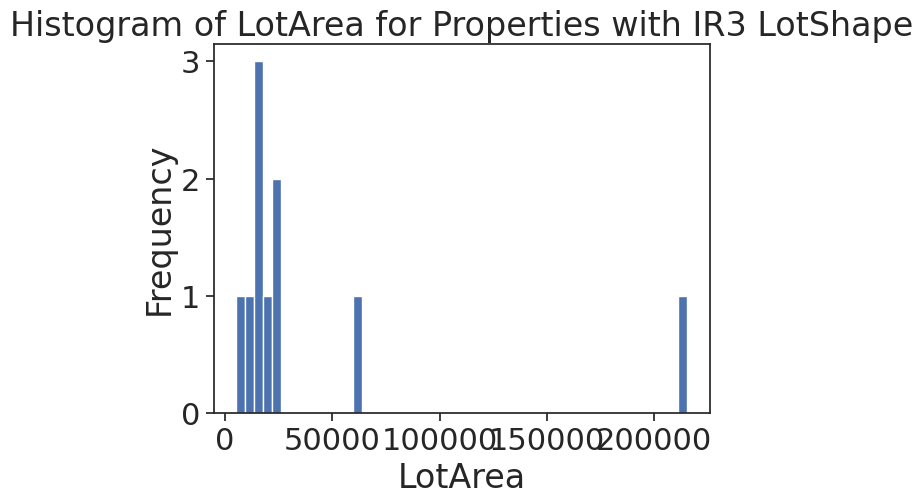

In [119]:
# create a new dataframe with only properties having IR3 lot shape
ir3_df = df[df['LotShape'] == 'IR3']

# plot histogram of LotArea for IR3 properties
plt.hist(ir3_df['LotArea'], bins=50)
plt.xlabel('LotArea')
plt.ylabel('Frequency')
plt.title('Histogram of LotArea for Properties with IR3 LotShape')
plt.show()

Most of houses have lot area less than 50000 ft squared

## given that normal conditions has average sale price of 184495 , Is that valid for other conditions?

In [127]:
# Get and print mean of sale price for each value of Condition1 or Condition2
print(df.groupby('Condition1')['SalePrice'].mean()+df.groupby('Condition2')['SalePrice'].mean())


Artery    241591.666667
Feedr     263642.148148
Norm      365664.897600
PosA      550875.000000
PosN      500059.210526
RRAe      328400.000000
RRAn      321301.615385
RRNe                NaN
RRNn      309150.000000
Name: SalePrice, dtype: float64


In [97]:
from sklearn.feature_selection import f_oneway


conditions = df[["Condition1", "Condition2"]]
sale_price = df["SalePrice"]

f_statistic, p_value = f_oneway(*[sale_price[conditions[col] == condition] for col in conditions.columns for condition in conditions[col].unique()])

print('F statistic:', f_statistic)
print('P-value:', p_value)

if p_value < 0.05:
    print("There are significant differences between the groups")
else:
    print("There are no significant differences between the groups")

F statistic: [3.94207826]
P-value: [1.93692904e-07]


## We already know that Regular lot shape has an verage price of 164754 , Can we generalize that for other lot shapes?

In [141]:
# Get and print mean of sale price for each value of lot shape
print(df.groupby('LotShape')['SalePrice'].mean())

LotShape
IR1    206101.665289
IR2    239833.365854
IR3    216036.500000
Reg    164754.818378
Name: SalePrice, dtype: float64


In [142]:
lot_shapes = df["LotShape"]
sale_price = df["SalePrice"]

f_statistic, p_value = f_oneway(*[sale_price[lot_shapes == shape] for shape in lot_shapes.unique()])

print ('F statistic:', f_statistic)
print ('P-value:', p_value)

if p_value < 0.05:
    print("There are significant differences between the groups")
else:
    print("There are no significant differences between the groups")

F statistic: [40.13285166]
P-value: [6.44752385e-25]
There are significant differences between the groups


## What is the most features correlated to Sales price

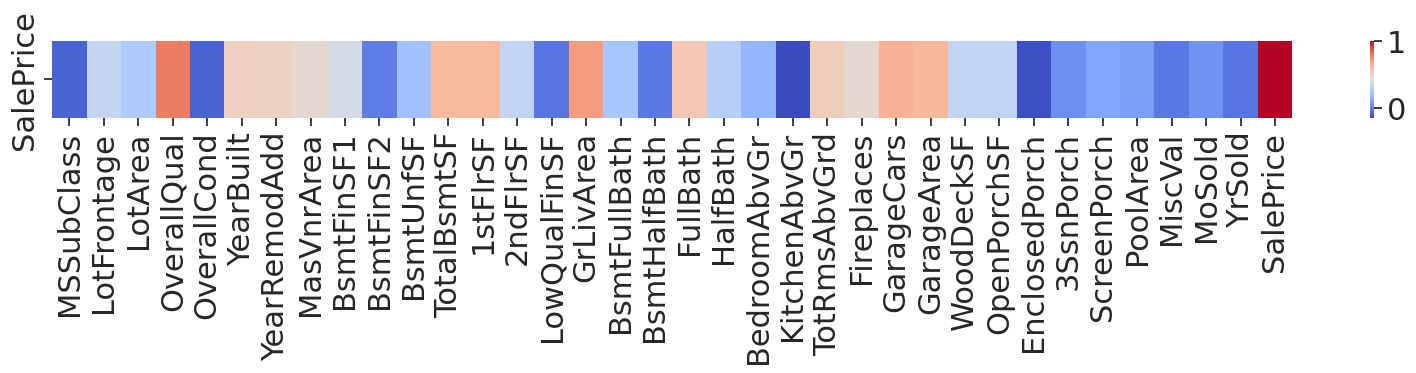

In [139]:
# Compute pairwise correlation of all numerical columns
corr_matrix = numeric_cols.corr().round(2)

# Plot correlation  of sale price with all other numerical columns
plt.figure(figsize=(20, 1))
sns.heatmap(corr_matrix.loc[['SalePrice'],:], annot=False, cmap='coolwarm')
plt.show()


In [28]:
# Compute pairwise correlation of all columns
corr_matrix = df.corr()

# Get the correlation values for the 'SalePrice' column, sort in descending order, and get the top 3 most correlated columns
top_corr_features = corr_matrix['SalePrice'].sort_values(ascending=False)[1:4]

# Print the top 3 most correlated columns with SalePrice
print("The top 3 most correlated variables with SalePrice are:")
print(top_corr_features)


The top 3 most correlated variables with SalePrice are:
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
Name: SalePrice, dtype: float64


Answer:
-----------
OverallQual    0.790982
<br>
GrLivArea      0.708624
<br>
GarageCars     0.640409
<br>
In summary, the result suggests that houses with higher overall quality, larger living area, and bigger garage tend to have a higher sale price.

# How does the style of dwelling affect its sale price?

Meaning of BldgTypes<br>
"1Fam" means a single-family detached home.
<br>
"TwnhsE" means a townhouse end unit (house attached on one side).
<br>
"Duplex" means a duplex (a building with two separate living units).
<br>
"Twnhs" means a townhouse (house attached on both sides).
<br>
"2fmCon" means a two-family conversion; a building originally built as a single-family home that has been converted to two separate living units.

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

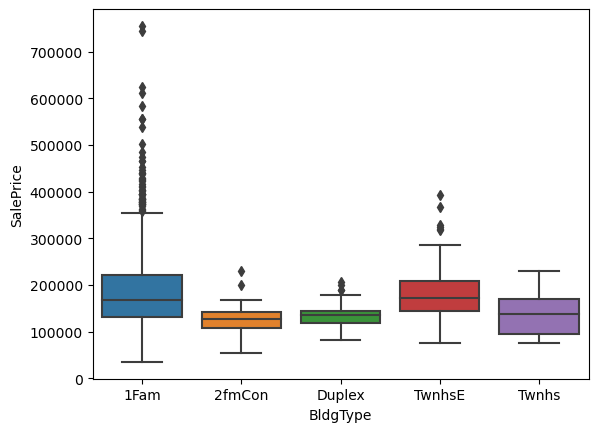

In [29]:
sns.boxplot(x='BldgType', y='SalePrice', data=df)

In [30]:
df.BldgType.value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

First Comment 1Fam (single family detached home) has higher sale prices than the other the lowest is Twnhs and 2fmCon

### Statistical Testing

In [31]:
from scipy.stats import ttest_ind

In [32]:
df_1fam = df[df['BldgType'] == '1Fam']['SalePrice']
df_twnhse = df[df['BldgType'] == 'TwnhsE']['SalePrice']
df_duplex = df[df['BldgType'] == 'Duplex']['SalePrice']
df_twnhs = df[df['BldgType'] == 'Twnhs']['SalePrice']
df_2fmcon = df[df['BldgType'] == '2fmCon']['SalePrice']

In [34]:
ttest_ind(df_1fam, df_twnhse)

Ttest_indResult(statistic=0.4795054437104094, pvalue=0.6316578138949069)

the style of dwelling (1Fam vs TwnhsE) does not have a significant effect on its sale price.

In [35]:
ttest_ind(df_1fam, df_duplex)

Ttest_indResult(statistic=4.543962350113056, pvalue=6.046271686674719e-06)

There is a significant difference between 1fam, duplex and 1 fam has higher sales prices

In [36]:
ttest_ind(df_1fam, df_twnhs)

Ttest_indResult(statistic=3.937156835690728, pvalue=8.696069414102615e-05)

There is a significant difference between 1fam, twnhs and 1 fam has higher sales prices

In [37]:
ttest_ind(df_1fam, df_2fmcon)

Ttest_indResult(statistic=3.852021699020662, pvalue=0.00012309127638279022)

There is a significant difference between 1fam, 2fam and 1 fam has higher sales prices (but less difference than the previously 2 mentioned ones

In [38]:
ttest_ind(df_twnhse, df_duplex)

Ttest_indResult(statistic=5.494146049916781, pvalue=1.4731286100745727e-07)

There is a significant difference between twnhse, duplex and twnhse has higher sales prices

In [46]:
ttest_ind(df_twnhse, df_twnhs)

Ttest_indResult(statistic=4.595160820966983, pvalue=8.90624373255204e-06)

There is a significant difference between twnhse, twnhs and twnhse has higher sales prices

In [40]:
ttest_ind(df_twnhse, df_2fmcon)

Ttest_indResult(statistic=4.694789113038583, pvalue=6.190767497269936e-06)

There is a significant difference between twnhse, 2fam and twnhse has higher sales prices

In [41]:
ttest_ind(df_duplex, df_twnhs)

Ttest_indResult(statistic=-0.3341637758347757, pvalue=0.73900835793048)

The 2 styles has no significant impact over SalesPrice (twnhs slightly higher than duplex)

In [42]:
ttest_ind(df_duplex, df_2fmcon)

Ttest_indResult(statistic=0.7291516817032021, pvalue=0.46801203943215886)

The 2 styles has no significant impact over SalesPrice

In [43]:
ttest_ind(df_twnhs, df_2fmcon)

Ttest_indResult(statistic=0.8182431034421546, pvalue=0.41591821798278894)

The 2 styles has no significant impact over SalesPrice

# What is the type of correlation between the region and provided utilities? Is it dependant on the price?

<AxesSubplot:>

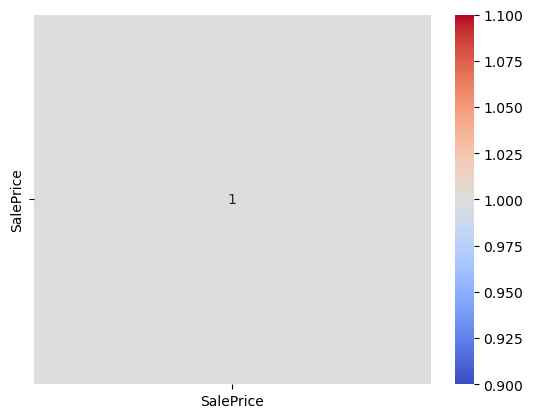

In [55]:
from scipy.stats import pearsonr

# create a correlation matrix
corr_matrix = df[['Utilities', 'SalePrice']].corr()

# visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


In [54]:
df.Neighborhood

0       CollgCr
1       Veenker
2       CollgCr
3       Crawfor
4       NoRidge
         ...   
1455    Gilbert
1456     NWAmes
1457    Crawfor
1458      NAmes
1459    Edwards
Name: Neighborhood, Length: 1460, dtype: object

# There are 7 Garage Features ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond'] . Is there any correlation between those features ? and if there is, can any of them be removed?

In [59]:
df.GarageType.value_counts()

Attchd       870
Detchd       387
BuiltIn       88
No garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64

In [63]:
# Replace "No garage" with -1
df['GarageYrBlt'] = df['GarageYrBlt'].replace("No garage", -1)

# Convert the column to a numerical type
df['GarageYrBlt'] = pd.to_numeric(df['GarageYrBlt'])

In [64]:
df.GarageYrBlt.value_counts()

-1.0       81
 2005.0    65
 2006.0    59
 2004.0    53
 2003.0    50
           ..
 1927.0     1
 1900.0     1
 1906.0     1
 1908.0     1
 1933.0     1
Name: GarageYrBlt, Length: 98, dtype: int64

In [65]:
corr_matrix = df[['GarageYrBlt', 'SalePrice']].corr()
print(corr_matrix)

             GarageYrBlt  SalePrice
GarageYrBlt     1.000000   0.261354
SalePrice       0.261354   1.000000


In [66]:
# Low Corr: drop the column
df.drop('GarageYrBlt', axis=1, inplace=True)

In [81]:
# Define a dictionary to map string values to numerical values
garage_type_map = {'Attchd': 1, 'Detchd': 2, 'BuiltIn': 3, 'No garage': 0, 'Basment': 4, 'CarPort': 5, '2Types': 6}

# Replace string values with numerical values using the map
df['GarageTypeNum'] = df['GarageType'].replace(garage_type_map)


In [82]:
df.GarageFinish.value_counts()

Unf          605
RFn          422
Fin          352
No garage     81
Name: GarageFinish, dtype: int64

In [83]:
# create a mapping dictionary for the values in GarageFinish
garage_finish_map = {'No garage': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

# create a new column GarageFinishNum based on the mapping dictionary
df['GarageFinishNum'] = df['GarageFinish'].map(garage_finish_map)


In [84]:
df.GarageQual.value_counts()

TA           1311
No garage      81
Fa             48
Gd             14
Ex              3
Po              3
Name: GarageQual, dtype: int64

In [85]:
garage_qual_dict = {'No garage': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
df['GarageQualNum'] = df['GarageQual'].map(garage_qual_dict).fillna(0)

In [76]:
garage_features = ['GarageTypeNum',  'GarageFinishNum', 'GarageCars', 'GarageArea', 'GarageQualNum', 'GarageCond']
garage_df = df[garage_features]
garage_corr = garage_df.corr()


<AxesSubplot:>

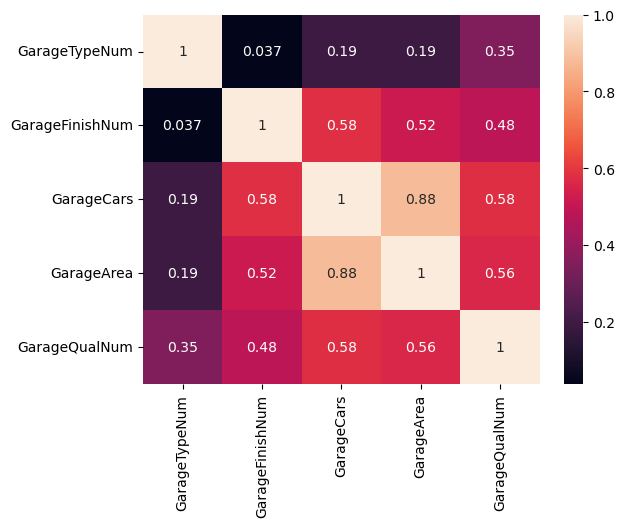

In [77]:
sns.heatmap(garage_corr, annot=True)

In [86]:
df[['GarageTypeNum', 'GarageFinishNum', 'GarageQualNum', 'SalePrice']].corr()

,GarageTypeNum,GarageFinishNum,GarageQualNum,SalePrice
GarageTypeNum,1.000000,0.037354,0.346592,-0.035319
GarageFinishNum,0.037354,1.000000,0.482399,0.549247
GarageQualNum,0.346592,0.482399,1.000000,0.273839
SalePrice,-0.035319,0.549247,0.273839,1.000000


In [87]:
df = df.drop(columns=['GarageTypeNum', 'GarageFinishNum', 'GarageQualNum'])

In [79]:
df[['GarageCars', 'GarageArea', 'SalePrice']].corr()

,GarageCars,GarageArea,SalePrice
GarageCars,1.000000,0.882475,0.640409
GarageArea,0.882475,1.000000,0.623431
SalePrice,0.640409,0.623431,1.000000


In [80]:
df.drop('GarageArea', axis=1, inplace=True)

In [88]:
# Due to low correlation betwen GarageType and SalesPrice remove GarageType Coumn
df.drop('GarageType', axis=1, inplace=True)

From the Garage Columns There was [GarageArea, GarageCars] has large correlation so GarageArea is removed, also GarageType has very low correlation with all Garage Features and SalesPrice so it is dropped also, and the GarageYrBlt has very small corr with SalesPrice also.

# Is there a significant difference in the mean SalePrice between properties with and without a pool (PoolArea > 0 vs. PoolArea = 0)?

In [89]:
df_with_pool = df[df['PoolArea'] > 0]
df_without_pool = df[df['PoolArea'] == 0]


In [90]:
mean_with_pool = df_with_pool['SalePrice'].mean()
mean_without_pool = df_without_pool['SalePrice'].mean()


In [91]:
ttest_ind(df_with_pool['SalePrice'], df_without_pool['SalePrice'], equal_var=False)

Ttest_indResult(statistic=1.3827137645434016, pvalue=0.21594886916569525)

Answer:
------------
 there is no significant difference in the mean SalePrice between properties with and without a pool.

# What is the distribution of SalePrice in the dataset, and is it skewed or normal?

/home/yousef/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

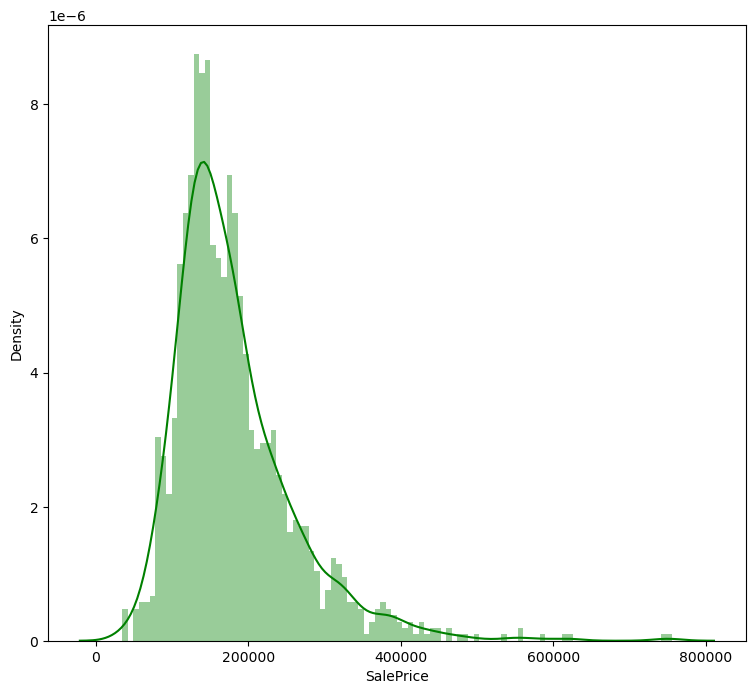

In [92]:
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4})

mean     180921.195890
std       79442.502883

SalePrice follow Normal Distribution
$$\mu = 180921 \\ \sigma = 79442$$

It is left skewed normal distribution

# Building Regression Model

In [94]:
cat_columns = df.select_dtypes(include=['object']).columns
print(cat_columns)


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')


In [95]:
len(cat_columns)

42

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('SalePrice', axis=1), df['SalePrice'], test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train=scaler.fit_transform(X_train)

X_test=scaler.fit_transform(X_test)

lr = LinearRegression()
lr.fit(X_train,y_train)



In [100]:
from scipy.stats import pearsonr

df['KitchenQualNum'] = df['KitchenQual'].replace({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1})


# Calculate the correlation coefficient and p-value
corr_coef, p_value = pearsonr(df['KitchenQualNum'], df['SalePrice'])

# Print the results
print(f"The correlation coefficient is: {corr_coef:.3f}")
print(f"The p-value is: {p_value}")

The correlation coefficient is: 0.660
The p-value is: 5.051357364029292e-183


relationship between KitchenQual and SalePrice is not due to chance, but rather there is a real causal effect between the two variables.

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Select the features to use
X = df[['OverallQual']]
# Select the target variable
y = df['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the SalePrice of the test data
y_pred = model.predict(X_test)

# Calculate the R-squared score of the model
r2 = r2_score(y_test, y_pred)
print(f'R-squared score: {r2:.3f}')

# Calculate the root mean squared error of the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse:.2f}')


R-squared score: 0.650
Root Mean Squared Error: 51778.63


the model is able to capture 65% of the variation in the sale prices based on the values of the selected features.

# Can we predict the type of heating (Heating) in a property based on its age (YrSold - YearBuilt) and the type of foundation (Foundation)? 

In [102]:
df['Age'] = df['YrSold'] - df['YearBuilt']

In [103]:
X = df[['Age', 'Foundation']]
y = df['Heating']


In [104]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['Foundation'] = le.fit_transform(X['Foundation'])
y = le.fit_transform(y)


/tmp/ipykernel_20388/2589834008.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Foundation'] = le.fit_transform(X['Foundation'])


In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [106]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


/home/yousef/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [107]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)


In [109]:
print(f"Accuracy = {accuracy}")

Accuracy = 0.9840182648401826


In [110]:
print(f"Confusion Matrix")
confusion_matrix

Confusion Matrix


array([[431,   0,   0,   0],
       [  3,   0,   0,   0],
       [  3,   0,   0,   0],
       [  1,   0,   0,   0]])

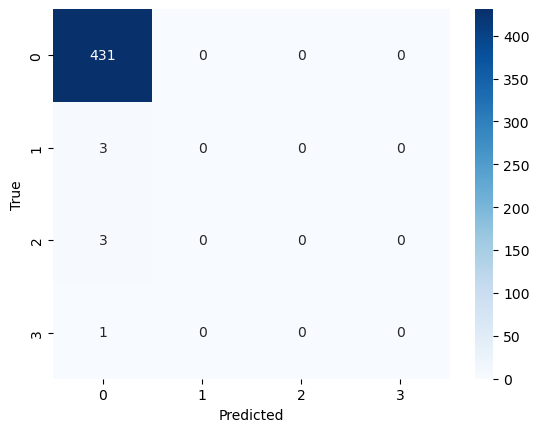

In [112]:
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')

# add labels to the plot
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [113]:
df.Heating.value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

We Cannot Predict the Heating Based on the Age due to the huge value_counts

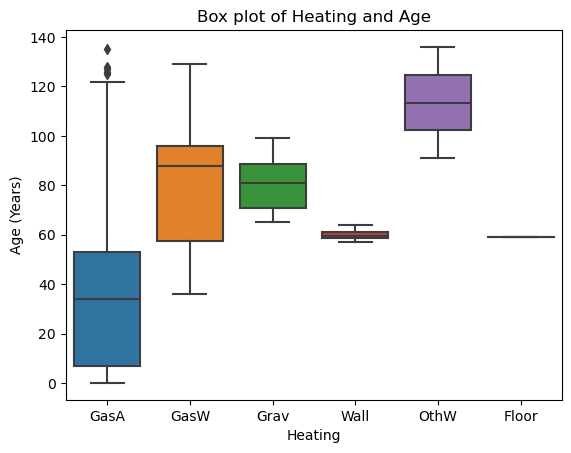

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Heating", y="Age", data=df)
plt.title("Box plot of Heating and Age")
plt.xlabel("Heating")
plt.ylabel("Age (Years)")
plt.show()


**But We note that the GasA has the lower range of edges (without the outlairs)**

In [122]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Filter out samples with GasA as heating type
df_filtered = df[df['Heating'] != 'GasA']

# Prepare the features and target variables
X = df_filtered[['Age', 'Foundation']]
y = df_filtered['Heating']

le = LabelEncoder()
X['Foundation'] = le.fit_transform(X['Foundation'])
y = le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the linear regression model
model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)


/tmp/ipykernel_20388/2890433407.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Foundation'] = le.fit_transform(X['Foundation'])
/home/yousef/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


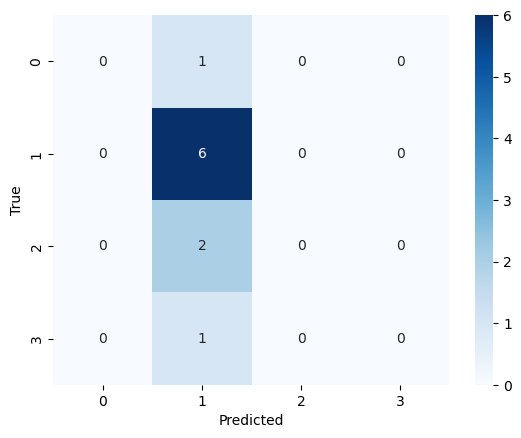

In [123]:
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')

# add labels to the plot
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

The Final Answer is no, cannot be predicted based on the Age